In [1]:
# Import PySwarms
import numpy as np
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import statistics # added for the mean computation
from collections import defaultdict # added to compare elements of the list
from itertools import tee # to allow pairwise comparisons
from scipy.spatial.distance import cosine # to compute cosine distance

In [2]:
# ... I also made some experiments with PySwarm

In [3]:
# Adapted from: https://machinelearningmastery.com/a-gentle-introduction-to-particle-swarm-optimization/

In [4]:
#n_particles = 10
#X = np.random.rand(2, n_particles)
#V = np.random.randn(2, n_particles)

In [5]:
#n_particles = 3
#print(np.random.rand(2, n_particles)*0.1 + 0.2)

In [6]:
n_particles = 3
print(np.random.rand(2, n_particles)*0.1 + 0.2)
print(np.random.rand(2, n_particles)*0.1 + 0.5)

[[0.2742957  0.22969672 0.22136571]
 [0.23471135 0.20529591 0.2194392 ]]
[[0.57555647 0.59457401 0.52274982]
 [0.57344688 0.59875383 0.50127676]]


2022-09-14 19:25:51,007 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2022-09-14 19:25:51,008 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


PSO found best solution at f([0.79789083 0.90391532])=1.9778319974560986e-05
Global optimal at f([0.797979797979798, 0.8989898989898991])=5.101520253035246e-06
The X-coodinates  are:  [0.79825456 0.79882073 0.79904531 0.79883491 0.7985965  0.79839955
 0.79859359 0.79875147 0.79863043 0.79898892]
The Y-coodinates  are:  [0.90503648 0.9051121  0.90478587 0.90437899 0.90485243 0.90484493
 0.9047756  0.90522825 0.90507093 0.90490582]


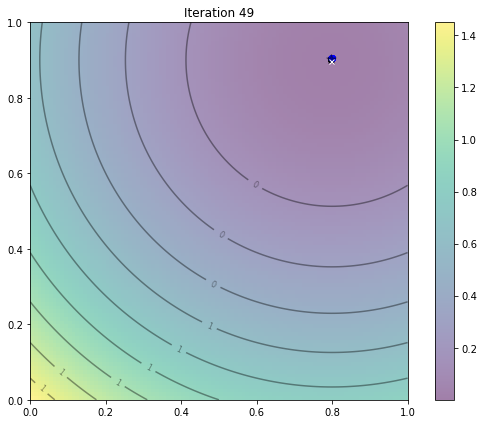

In [7]:

def f(x,y):
    "Objective function"
    #return (x-0.9)**2 + (y-0.5)**2 # new
    return (x-0.8)**2 + (y-0.9)**2 # September 14, tests l, m, n
    
# Compute and plot the function in 3D within [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))) # 1, not 5
z = f(x, y)
 
# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
 
# Hyper-parameter of the algorithm
c1 = c2 = 0.1 # 0.1
w = 0.8 # 0.8
 
# Create particles
n_particles = 10 # 20
np.random.seed(1000) # take away or leave it here?
#X = np.random.rand(2, n_particles)*0.9  # I can generate them randomly but close between them... from the nest
#V = np.random.rand(2, n_particles)*0.01
X = np.random.rand(2, n_particles)*0.1 + 0.2
V = np.random.rand(2, n_particles)*0.1 + 0.2


#X = np.random.rand(2, n_particles) * 5
#V = np.random.randn(2, n_particles) * 0.1



# 0.2 + 0.2; 0.01 + 0.5

# with these parameters, we are already on the target:
# X = np.random.rand(2, n_particles)* 0.9
# V = np.random.rand(2, n_particles)*0.01
# also with 0.2, 0.4


#X = np.random.rand(2, n_particles) * 5
#V = np.random.randn(2, n_particles) * 0.1
 
# Initialize data
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()
 
def update():
    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    # Update params
    # r1, r2 = np.random.rand(2)
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    obj = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()
 
# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 1, 0, 1], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([0,1])
ax.set_ylim([0,1])


def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    update()
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot
 
anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)
anim.save("PSO.gif", dpi=120, writer="imagemagick")
 
print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))



# putting these commands over there, we get the values at the end of the simulation
print("The X-coodinates  are: ", X[0]) # Added on September 14
print("The Y-coodinates  are: ", X[1]) # Added on September 14

In [8]:
# define a class Robot_PSO with the x, y instances... or, directly work with the arrays?
# Not needed classes here, we already have the position outputs, and the X[0], X[1] already as lists.

# class of the target (here: minimum of the objective function)

class Target:
    def __init__(self,name,x,y): # no indetermination in the target's position
        self.name = name
        self.x = x
        self.y = y

T = Target("T", 0.9, 0.5) # deep in the ocean


In [9]:
#listX = list(k.betax for k in Robot._registry)
#listY = list(k.betay for k in Robotx._registry)

listX = X[0]
listY = X[1]

num_of_robots = 10

def Euclidean_distance(T, listX, listY): # the same as distance_A
    sum_x = sum(listX)
    sum_y = sum(listY)
    center_x = sum_x/num_of_robots
    center_y = sum_y/num_of_robots
    return ((T.x - center_x)**2 + (T.y - center_y)**2)**0.5

print("Euclidean", Euclidean_distance(T, listX, listY))

def Manhattan_distance(T, listX, listY):
    sum_x = sum(listX)
    sum_y = sum(listY)
    center_x = sum_x/num_of_robots
    center_y = sum_y/num_of_robots
    return (abs(T.x - center_x) + abs(T.y - center_y))

print("Manhattan", Manhattan_distance(T, listX, listY))

def Cosine_distance(T, listX, listY):
    sum_x = sum(listX)
    sum_y = sum(listY)
    center_x = sum_x/num_of_robots
    center_y = sum_y/num_of_robots
    array_1 = np.array([center_x, T.x])
    array_2 = np.array([center_y, T.y])
    return cosine(array_1, array_2)

print("Cosine", Cosine_distance(T, listX, listY))

Euclidean 0.41738076942857055
Manhattan 0.5062075428911352
Cosine 0.0573018802329851
